# Multiclass Classification

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_blobs
np.set_printoptions(precision=2)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Prepare and visualize our data using make_blobs

In [5]:
classes = 4
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
m = 100
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

(100, 2)
(100,)
[0 1 2 3]


## Plot the given Datasets and visulize the data

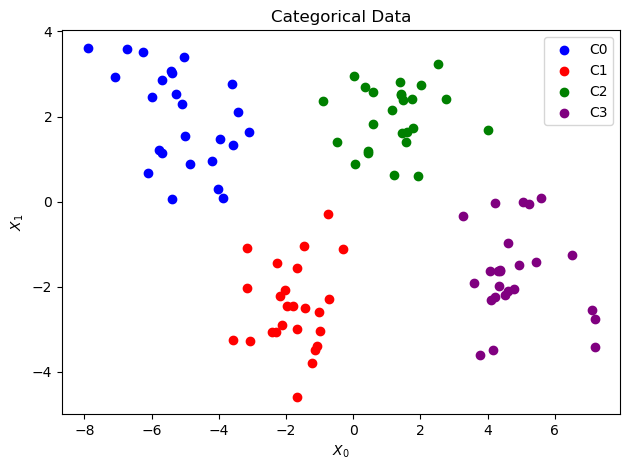

In [13]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c="b", label="C0")
ax.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c="r", label="C1")
ax.scatter(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], c="g", label="C2")
ax.scatter(X_train[:, 0][y_train == 3], X_train[:, 1][y_train == 3], c="purple", label="C3")

ax.set_title("Categorical Data")
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")

plt.tight_layout()
ax.legend()

## Model

We will train a model with prefferd type of design which will have two units in its first layer and 4 units in its 2nd layer.  
The second layer will also be the output layer.

We will use a random seed that it don't create another example every time

In [17]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(2, activation='relu'),
        Dense(4, activation='linear')
    ]
)

In [19]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7647
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7602
Epoch 3/200
4/4 [==============================] - 0s 955us/step - loss: 0.7564
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7524
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7488
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7451
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7413
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7375
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7338
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7301
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7264
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7228
Epoch 13/200
4/4 [==============================] - 0s 2ms/

### Plot the original dataset and the data predicted by the model side by side

In [24]:
pred_y = np.argmax(model.predict(X_train), axis=1)

4/4 [==============================] - 0s 1ms/step


In [28]:
pred_y_p = tf.nn.softmax(model.predict(X_train))

4/4 [==============================] - 0s 1ms/step


In [29]:
pred_y_pp = np.argmax(pred_y_p, axis=1)

In [31]:
np.all(pred_y == pred_y_pp)

True

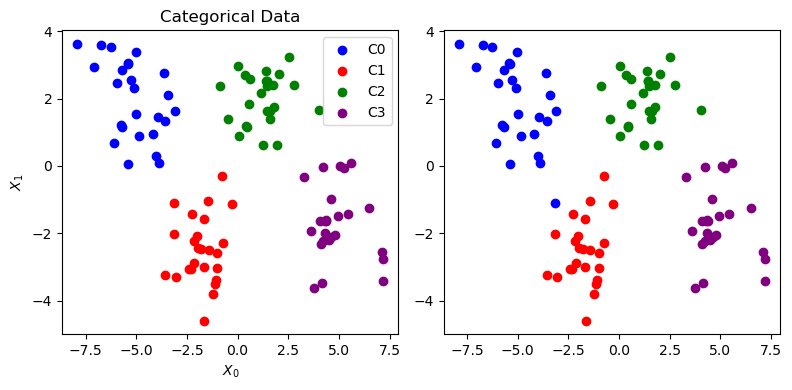

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c="b", label="C0")
ax[0].scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c="r", label="C1")
ax[0].scatter(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], c="g", label="C2")
ax[0].scatter(X_train[:, 0][y_train == 3], X_train[:, 1][y_train == 3], c="purple", label="C3")

ax[1].scatter(X_train[:, 0][pred_y == 0], X_train[:, 1][pred_y == 0], c="b", label="C0")
ax[1].scatter(X_train[:, 0][pred_y == 1], X_train[:, 1][pred_y == 1], c="r", label="C1")
ax[1].scatter(X_train[:, 0][pred_y == 2], X_train[:, 1][pred_y == 2], c="g", label="C2")
ax[1].scatter(X_train[:, 0][pred_y == 3], X_train[:, 1][pred_y == 3], c="purple", label="C3")

ax[0].set_title("Categorical Data")
ax[0].set_xlabel("$X_0$")
ax[0].set_ylabel("$X_1$")
ax[0].legend()

plt.tight_layout()